#Atividade CNN
Implemente um exemplo de uma rede CNN para classificar imagens.  



1.  Calcular a função perda.
2.  Inclua a camada "Softmax" para mostrar as probabilidades de classificação.
3.  Faça a avaliação do modelo traçando o gráfico de Perdas/Acurácia X quantidade de épocas.
4.  Inclua uma base de teste para verificar o modelo.

#Atualizando bibliotecas, importando e lendo dados de treino e teste

Atualizando tensorflow

In [ ]:
#Atualizando tensorflow
!pip install -U tensorflow

Lendo bibliotecas

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix

Lendo imagens de teste e treino:

In [ ]:
#Lendo datasets de exemplo do keras
fashion_mnist = keras.datasets.fashion_mnist

#Separando as tuplas de dados
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Nomes das classes das imagens
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Printando dimensões das variáveis
#Dados de treino
print(train_images.shape, len(train_labels))

#Dados de treino de teste
print(test_images.shape, len(test_labels))




(60000, 28, 28) 60000
(10000, 28, 28) 10000


#Pré-processamento das imagens

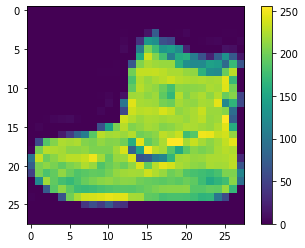

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As imagens estão com valores de pixel entre 0-255, portanto é necessário normalizar (entre 0-1)

In [ ]:
#Normalizando
train_images = train_images / 255.0
test_images = test_images / 255.0

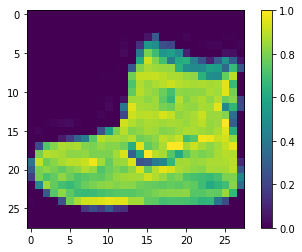

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Agora vamos visualizar as primeiras imagens com suas classes para fazer uma inspeção visual dos dados:

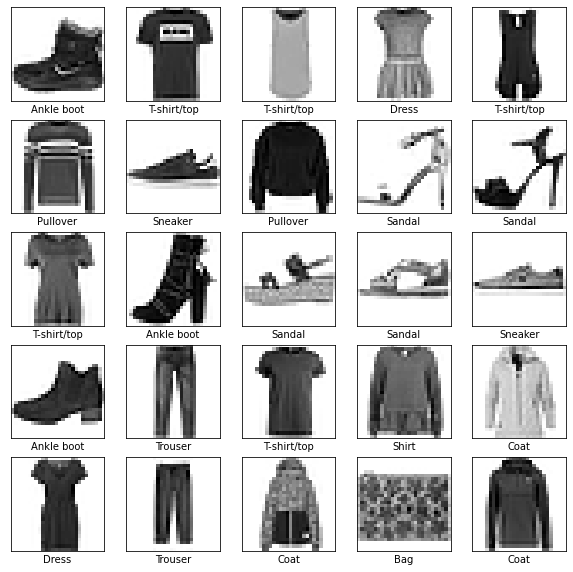

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Criando modelo da CNN

Primeiro montamos a camada, vamos adicionar a camada "softmax" pedida na atividade 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Agora é necessário configurar opções adicionais ao nosso modelo, isso é feito na etapa de compilação, onde também é decidido a função de perda pedido na atividade

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Gráfico de Acurácia x Quantidade de épocas

In [ ]:
#função para o gráfico de acurácia
def accuracy(n_epochs):
  test_score = []

  for i in n_epochs:
    model.fit(train_images, train_labels, epochs=i)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    test_score.append(test_acc)

  return test_score

#gerando gráfico utilizando de n_epochs=5 até n_epochs=20
n_epochs = range(7, 20)
acc = accuracy(n_epochs)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4966 - accuracy: 0.8257
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8649
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8772
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8848
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8911
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8953
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9005
313/313 - 0s - loss: 0.3431 - accuracy: 0.8782 - 484ms/epoch - 2ms/step
Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9042
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9077
Epoch 3/8
1875/1875

Text(0, 0.5, 'Acurácia')

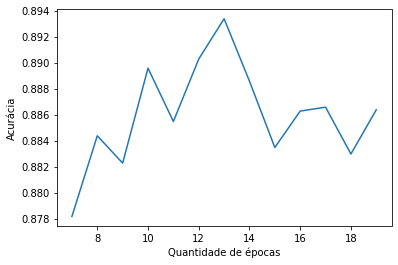

In [ ]:
#Plotando gráfico
plt.plot(n_epochs,acc)
plt.xlabel("Quantidade de épocas")
plt.ylabel("Acurácia")

In [ ]:
#Escolhendo a melhor quantidade de épocas
max = np.max(acc)


for item in acc:
  if item==max:
    n_epochsOtimo = n_epochs[acc.index(item)]

print("Quantidade ótima de épocas: ", n_epochsOtimo)

Quantidade ótima de épocas:  13


#Fazendo predições, gerando matriz de confusão

Utilizando a quantidade de épocas encontrada anteriormente, vamos fazer o fit do modelo

In [ ]:
model.fit(train_images, train_labels, epochs=n_epochsOtimo)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Acurácia do modelo: ", test_acc)

Epoch 1/13
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0324 - accuracy: 0.9878
Epoch 2/13
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0290 - accuracy: 0.9898
Epoch 3/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9907
Epoch 4/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9891
Epoch 5/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9900
Epoch 6/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9903
Epoch 7/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9896
Epoch 8/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9903
Epoch 9/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9894
Epoch 10/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.029

Fazendo predições

In [ ]:
#Fazendo a predição
predictions = model.predict(test_images)
print(predictions[0])
#É gerado uma lista com níveis de confiança para cada classe, vamos utilizar o maior nível como a classe prevista
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

[0.0000000e+00 5.6207844e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.9534415e-28 0.0000000e+00 1.9819083e-13 0.0000000e+00 1.0000000e+00]
9


Gerando a matriz de confusão

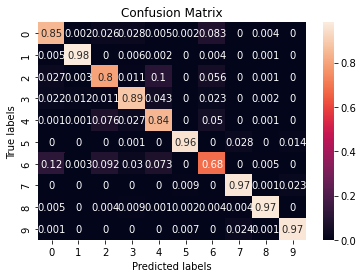

In [ ]:
#matriz de confusão
cm = confusion_matrix(test_labels, predictions)

#matriz de confusão normalizada
cmn = (cm.T / cm.astype(np.float).sum(axis=1)).T

ax= plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['0', '1']); 
#ax.yaxis.set_ticklabels(['0', '1']);